In [1]:
import fakedoocs as pydoocs
from simplebo import SimpleBO
from fakedoocs import rosenbrock
import json
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [2]:
# load config
with open("conf/test_rosenbrock.json", "r") as f:
    config_dict = json.load(f)

In [3]:
# construct optimizer object
bo = SimpleBO(config_dict, readonly=False, acquisition="UCB", n_init=10, step_limit_type="proximal", proximal_len=0.5)  # check proximal biasing
# bo = SimpleBO(config_dict, readonly=False, acquisition="UCB", step_limit_type="hard", step_size=0.1)

In [4]:
%%capture
# run optimizer
bo.max_steps = 100 # change opt. settings afterwards
bo.optimize()

In [5]:
xx, yy = np.meshgrid(np.linspace(bo.bounds[0,0], bo.bounds[1,0]),np.linspace(bo.bounds[0,1], bo.bounds[1,1]))
xin = np.stack([xx.flatten(), yy.flatten()]).T
zz = -np.array([rosenbrock(x) for x in xin]).reshape(xx.shape)

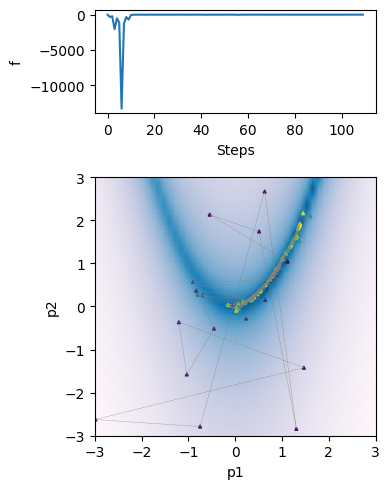

In [6]:
fig, axes = plt.subplots(2,1,height_ratios=[1,2.5], figsize=(4,5))
axes[0].plot(bo.Y.detach().numpy().flatten())
axes[0].set_xlabel("Steps")
axes[0].set_ylabel("f")
axes[1].pcolormesh(xx, yy, zz, norm=colors.LogNorm(vmin=zz.min(), vmax=zz.max()), cmap ='PuBu_r',shading="gouraud")
axes[1].plot(bo.X[:,0], bo.X[:,1], "--", c="gray",lw=0.3)
axes[1].scatter(bo.X[:,0], bo.X[:,1],s=4, c=list(range(len(bo.Y))), marker="^",zorder=1)
axes[1].set_xlabel("p1")
axes[1].set_ylabel("p2")
fig.tight_layout()

tensor(-0.0187, dtype=torch.float64)


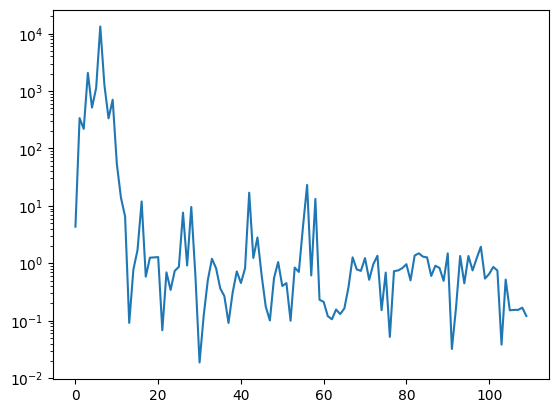

In [7]:
plt.plot(-bo.Y.detach().numpy().flatten())
plt.yscale("log")
print(bo.Y.detach().max())


Text(0.5, 0, 'Steps')

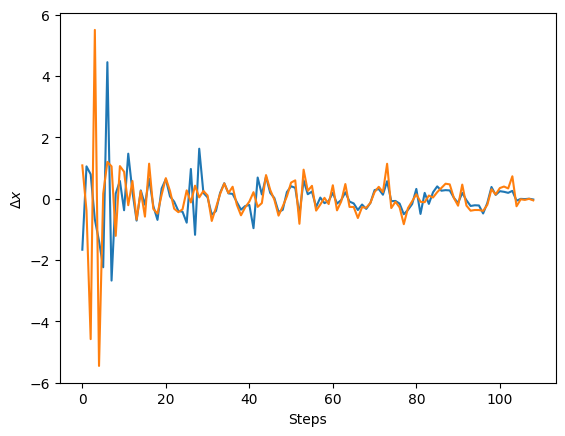

In [8]:
x = bo.X.detach().numpy()
dx = x[1:] - x[:-1]
plt.plot(dx)
plt.ylabel(r"$\Delta x$")
plt.xlabel("Steps")